<a href="https://colab.research.google.com/github/HuangJin-De/Machine-Learning-in-Atmospheric-Thermodynamics/blob/main/hw02/hw02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

! rm -rf ./drive/MyDrive/CP_data/MLAT
! git clone https://github.com/HuangJin-De/Machine-Learning-in-Atmospheric-Thermodynamics.git ./drive/MyDrive/CP_data/MLAT 

Mounted at /content/drive
Cloning into './drive/MyDrive/CP_data/MLAT'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 153 (delta 31), reused 13 (delta 0), pack-reused 0
Receiving objects: 100% (153/153), 1.10 MiB | 9.40 MiB/s, done.
Resolving deltas: 100% (31/31), done.


Text(0, 0.5, 'frequency [%]')

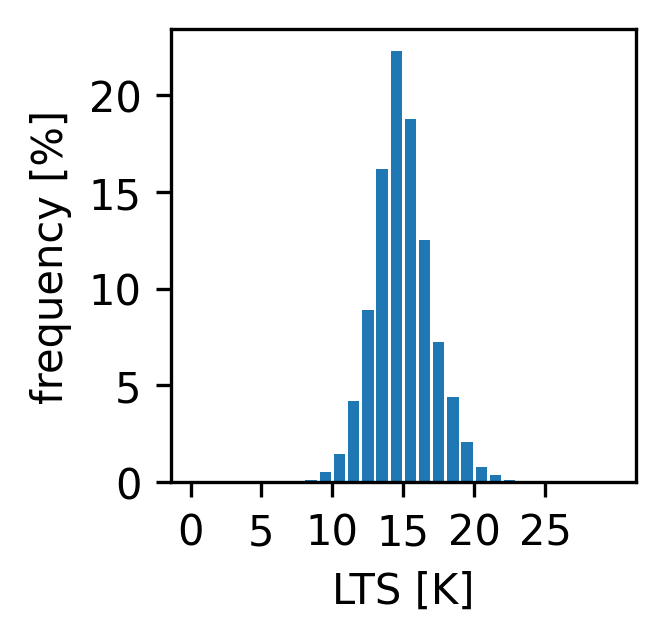

In [3]:
filen='./drive/MyDrive/CP_data/MLAT/hw02/data/freq_data.dat'
x=np.arange(0.5,30.5,1)
freq=np.fromfile(filen,dtype=np.float32)
freq=freq/np.sum(freq)*100.

#print(x.shape)
#print(freq.shape)

fig,ax=plt.subplots(figsize=(2,2),dpi=300)
ax.bar(x,freq)
plt.xticks(np.arange(0,30,5))
plt.xlabel('LTS [K]')
plt.ylabel('frequency [%]')

[ 2.5  7.5 12.5 17.5 22.5 27.5 32.5 37.5 42.5 47.5 52.5 57.5 62.5 67.5
 72.5 77.5 82.5 87.5 92.5 97.5]


([<matplotlib.axis.XTick at 0x7f3605193c90>,
 [Text(0, 0, '7'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15'),
  Text(0, 0, '16'),
  Text(0, 0, '25')])

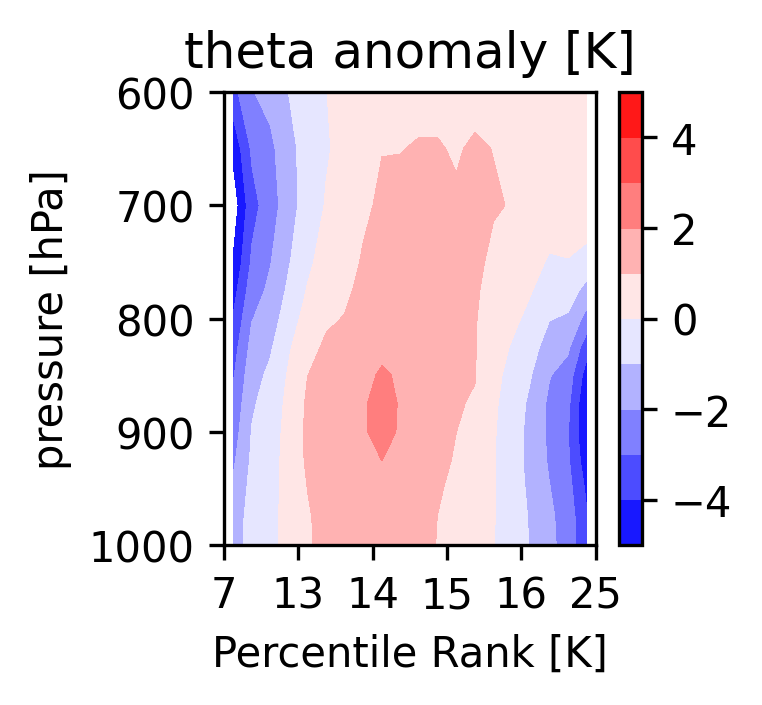

In [64]:
filen='./drive/MyDrive/CP_data/MLAT/hw02/data/lts_ranking_data.dat'
x=np.arange(2.5,98,5)
y=np.array([100,125,150,175,200,225,250,300,350,400,450,500,550,600,650,700,750,775,800,825,850,875,900,925,950,975,1000],dtype=float)
var=np.fromfile(filen,dtype=np.float32).reshape(4,27,20)
rank=np.array([7,13,14,15,16,25])
#print(th.shape)
print(x)

fig,ax=plt.subplots(figsize=(2,2),dpi=300)
th=var[0,:,:]
th=th-np.mean(th,1)[:,np.newaxis]

im=ax.contourf(x,y,th,cmap='bwr',levels=np.arange(-5,6,1))
plt.xticks(np.arange(0,100,20))
plt.xlabel('Percentile Rank [K]')
plt.ylabel('pressure [hPa]')
plt.title('theta anomaly [K]')
ax.set_ylim([600, 1000])
ax.invert_yaxis()
plt.colorbar(im,extend='extend')
plt.xticks(ticks=np.arange(0,101,20),labels=rank)

([<matplotlib.axis.XTick at 0x7f360534fc10>,
 [Text(0, 0, '7'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15'),
  Text(0, 0, '16'),
  Text(0, 0, '25')])

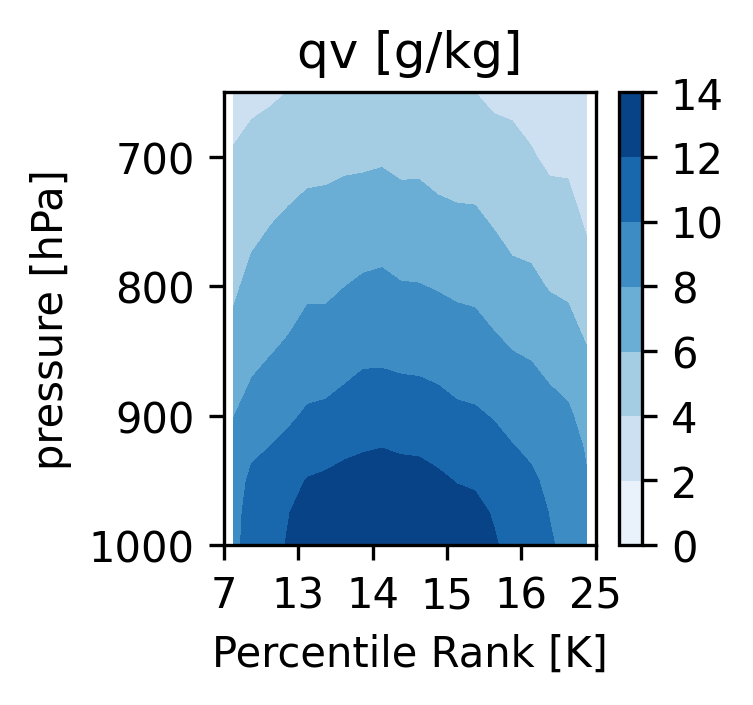

In [65]:
fig,ax=plt.subplots(figsize=(2,2),dpi=300)
qv=var[1,:,:]*1000.

im=ax.contourf(x,y,qv,cmap='Blues')
plt.xticks(np.arange(0,100,20))
plt.xlabel('Percentile Rank [K]')
plt.ylabel('pressure [hPa]')
plt.title('qv [g/kg]')
ax.set_ylim([650, 1000])
ax.invert_yaxis()
plt.colorbar(im,extend='extend')
plt.xticks(ticks=np.arange(0,101,20),labels=rank)

([<matplotlib.axis.XTick at 0x7f3604f3ae90>,
 [Text(0, 0, '7'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15'),
  Text(0, 0, '16'),
  Text(0, 0, '25')])

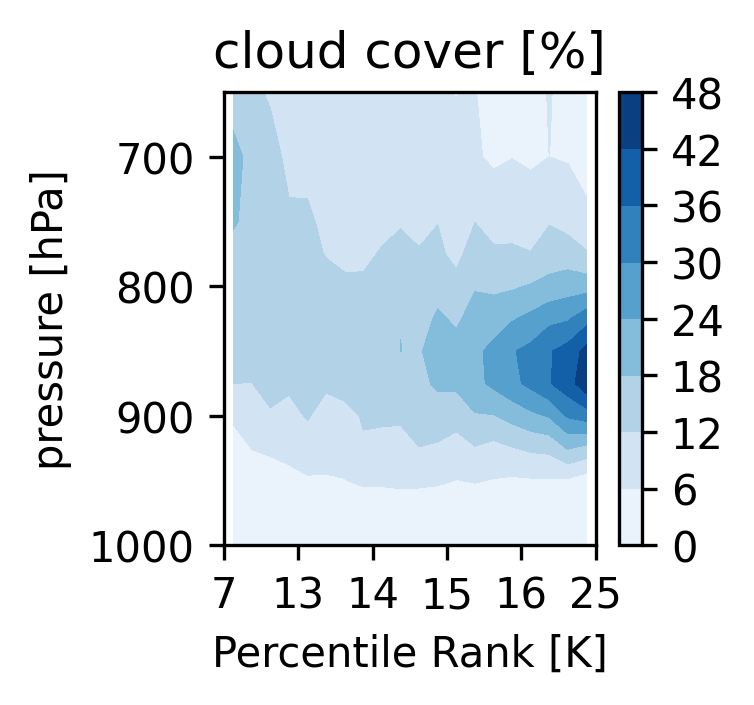

In [67]:
fig,ax=plt.subplots(figsize=(2,2),dpi=300)
cc=var[3,:,:]*100.

im=ax.contourf(x,y,cc,cmap='Blues')
plt.xticks(np.arange(0,100,20))
plt.xlabel('Percentile Rank [K]')
plt.ylabel('pressure [hPa]')
plt.title('cloud cover [%]')
ax.set_ylim([650, 1000])
ax.invert_yaxis()
plt.colorbar(im,extend='extend')
plt.xticks(ticks=np.arange(0,101,20),labels=rank)

([<matplotlib.axis.XTick at 0x7f3604cb2290>,
 [Text(0, 0, '7'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15'),
  Text(0, 0, '16'),
  Text(0, 0, '25')])

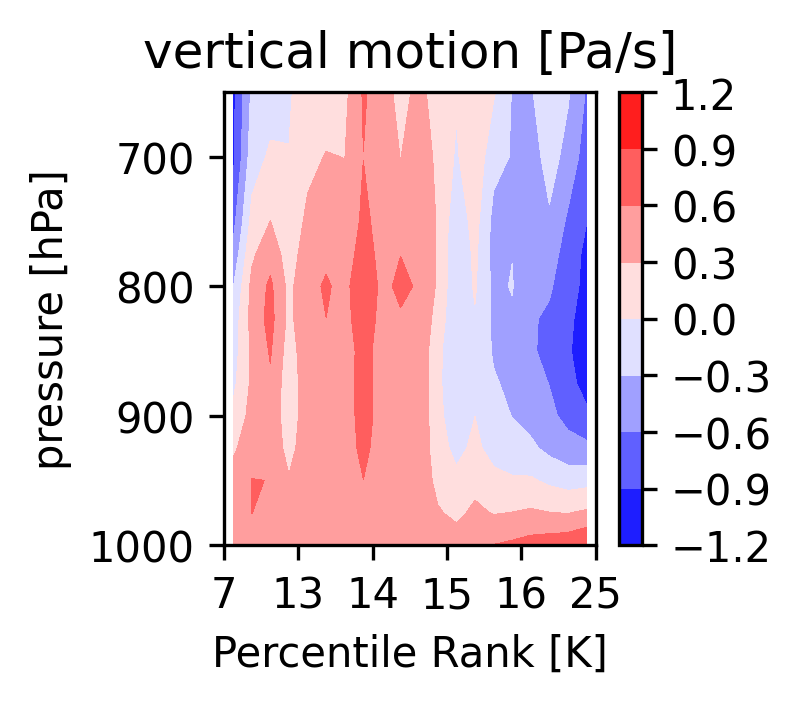

In [72]:
fig,ax=plt.subplots(figsize=(2,2),dpi=300)
w=-var[2,:,:]/0.8/9.8*100.

im=ax.contourf(x,y,w,cmap='bwr')
plt.xticks(np.arange(0,100,20))
plt.xlabel('Percentile Rank [K]')
plt.ylabel('pressure [hPa]')
plt.title('vertical motion [cm/s]')
ax.set_ylim([650, 1000])
ax.invert_yaxis()
plt.colorbar(im,extend='extend')
plt.xticks(ticks=np.arange(0,101,20),labels=rank)